# EDA: LogisticRegression

## Imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# preprocess
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE

# import model
from sklearn.linear_model import LogisticRegression

# Train-Test
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Load File

In [55]:
df = pd.read_csv('CLEANDATA/clean_data_N2.csv', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882247 entries, 0 to 882246
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   LIGHTING_CONDITION         882247 non-null  object
 1   CRASH_TYPE                 882247 non-null  object
 2   DAMAGE                     882247 non-null  object
 3   NUM_UNITS                  882247 non-null  int64 
 4   MOST_SEVERE_INJURY         882247 non-null  object
 5   CRASH_HOUR                 882247 non-null  int64 
 6   CRASH_DAY_OF_WEEK          882247 non-null  int64 
 7   CRASH_MONTH                882247 non-null  int64 
 8   SEC_CONTRIBUTORY_CAUSE_N   882247 non-null  object
 9   PRIM_CONTRIBUTORY_CAUSE_N  882247 non-null  object
 10  TRAFFICWAY_TYPE_N          882247 non-null  object
 11  ROAD_DEFECT_N              882247 non-null  object
 12  ROADWAY_SURFACE_COND_N     882247 non-null  object
 13  FIRST_CRASH_TYPE_N         882247 non-null  

In [56]:
df.head().T

,0,1,2,3,4
LIGHTING_CONDITION,DUSK,"DARKNESS, LIGHTED ROAD",DAYLIGHT,"DARKNESS, LIGHTED ROAD",DAYLIGHT
CRASH_TYPE,INJURY AND / OR TOW DUE TO CRASH,NO INJURY / DRIVE AWAY,NO INJURY / DRIVE AWAY,NO INJURY / DRIVE AWAY,INJURY AND / OR TOW DUE TO CRASH
DAMAGE,"OVER $1,500","OVER $1,500","OVER $1,500","OVER $1,500","OVER $1,500"
NUM_UNITS,2,2,4,2,2
MOST_SEVERE_INJURY,INCAPACITATING INJURY,NO INDICATION OF INJURY,NO INDICATION OF INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY
CRASH_HOUR,19,18,14,23,12
CRASH_DAY_OF_WEEK,3,6,7,4,6
CRASH_MONTH,9,9,7,8,8
SEC_CONTRIBUTORY_CAUSE_N,UNKNOWN,RECKLESS_DRIVING,RECKLESS_DRIVING,UNKNOWN,DISTRACTED
PRIM_CONTRIBUTORY_CAUSE_N,UNKNOWN,RECKLESS_DRIVING,DRIVING_EXPERIENCE,RECKLESS_DRIVING,RECKLESS_DRIVING


### Create Sample

In [57]:
sample_df = df.sample(n=16000, random_state=1)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 597559 to 687717
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   LIGHTING_CONDITION         16000 non-null  object
 1   CRASH_TYPE                 16000 non-null  object
 2   DAMAGE                     16000 non-null  object
 3   NUM_UNITS                  16000 non-null  int64 
 4   MOST_SEVERE_INJURY         16000 non-null  object
 5   CRASH_HOUR                 16000 non-null  int64 
 6   CRASH_DAY_OF_WEEK          16000 non-null  int64 
 7   CRASH_MONTH                16000 non-null  int64 
 8   SEC_CONTRIBUTORY_CAUSE_N   16000 non-null  object
 9   PRIM_CONTRIBUTORY_CAUSE_N  16000 non-null  object
 10  TRAFFICWAY_TYPE_N          16000 non-null  object
 11  ROAD_DEFECT_N              16000 non-null  object
 12  ROADWAY_SURFACE_COND_N     16000 non-null  object
 13  FIRST_CRASH_TYPE_N         16000 non-null  object
 14  WEATH

In [58]:
sample_df['DAMAGE'].value_counts()

DAMAGE
OVER $1,500      10119
$501 - $1,500     4078
$500 OR LESS      1803
Name: count, dtype: int64

## Working

In [59]:
# columns_to_encode = [
#     'LIGHTING_CONDITION', 'CRASH_TYPE', 'DAMAGE', 'MOST_SEVERE_INJURY', 'SEC_CONTRIBUTORY_CAUSE_N', 'PRIM_CONTRIBUTORY_CAUSE_N', 'TRAFFICWAY_TYPE_N', 
#     'ROAD_DEFECT_N', 'ROADWAY_SURFACE_COND_N', 'FIRST_CRASH_TYPE_N', 'WEATHER_CONDITION_N', 'TRAFFIC_CONTROL_DEVICE_N', 'DEVICE_CONDITION_N'
# ]

# label_encoder = LabelEncoder()

# for column in columns_to_encode:
#     sample_df[column] = label_encoder.fit_transform(sample_df[column])

In [60]:
# sample_df.head().T

### Train_test_split

In [61]:
X = sample_df.drop('DAMAGE', axis=1)
y = sample_df['DAMAGE']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((11200, 16), (4800, 16))

### Preprocessing

In [63]:
# LE = LabelEncoder()
# y_train_LE = LE.fit_transform(y_train)
# y_test_LE = LE.transform(y_test)

In [64]:
ss = StandardScaler(with_mean=False)
encoder = OneHotEncoder(handle_unknown='ignore')

In [65]:
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [66]:
X_train_scaled = ss.fit_transform(X_train_encoded)
X_test_scaled = ss.transform(X_test_encoded)

### Hypertuning

In [67]:

# C_list = [1e-4,1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3, 1e4]
# cv_scores = []
# cv_scores_std = []

# for c in C_list:
#     logreg = LogisticRegression(C = c, max_iter=1000) # using default lbfgs solver
#     cv_loop_results = cross_validate(
#                 X=X_train_scaled, 
#                 y=y_train,
#                 estimator=logreg, 
#                 cv=8)
#     cv_scores.append(np.mean(np.sqrt(np.abs(cv_loop_results['test_score']))))
#     cv_scores_std.append(np.std(np.sqrt(np.abs(cv_loop_results['test_score']))))

In [68]:
# fig, ax = plt.subplots()
# sns.lineplot(x = np.log10(C_list), y = cv_scores, marker = 's', ax = ax)
# ax.set_xlabel('Log(C)')
# ax.set_ylabel('Mean Accuracy')
# ax.set_title('Accuracy averaged on validation folds')
# plt.show()

In [69]:
# cv_scores

In [70]:
# cv_scores_std

---------------------------------------

In [71]:
model_LR = LogisticRegression(max_iter=10000, class_weight='balanced')

In [72]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # 'saga' supports both L1 and L2
}

In [73]:
grid_search = GridSearchCV(estimator=model_LR, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

In [74]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [75]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.6277678571428572


In [76]:
model = LogisticRegression(C=0.001, penalty='l1', solver='liblinear', max_iter=10000, class_weight='balanced')

In [77]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=10000,
                   penalty='l1', solver='liblinear')

In [78]:
model.score(X_train_scaled, y_train)

0.6321428571428571

In [79]:
model.score(X_test_scaled, y_test)

0.6454166666666666

In [80]:
y_pred = model.predict(X_test_scaled)

In [81]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 $500 OR LESS       0.53      0.10      0.17       558
$501 - $1,500       0.00      0.00      0.00      1162
  OVER $1,500       0.65      0.99      0.78      3080

     accuracy                           0.65      4800
    macro avg       0.39      0.36      0.32      4800
 weighted avg       0.48      0.65      0.52      4800



/opt/anaconda3/envs/mylearnenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mylearnenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mylearnenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

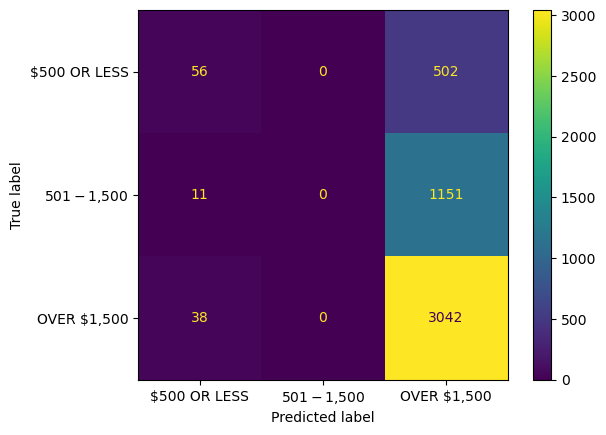

In [82]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

--------------------------

In [91]:
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(C=0.001, class_weight='balanced',
                                 max_iter=10000, penalty='l1',
                                 solver='liblinear'),
    n_features_to_select=5)

In [92]:
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:\n", selected_features)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 16 but corresponding boolean dimension is 131

In [94]:
feature_names = X.columns
coeff = model.coef_[0]

In [95]:
# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeff})

# Sort by absolute coefficient values
importance_df['Importance'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Importance', ascending=False)

ValueError: All arrays must be of the same length

In [88]:
X

,LIGHTING_CONDITION,CRASH_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,SEC_CONTRIBUTORY_CAUSE_N,PRIM_CONTRIBUTORY_CAUSE_N,TRAFFICWAY_TYPE_N,ROAD_DEFECT_N,ROADWAY_SURFACE_COND_N,FIRST_CRASH_TYPE_N,WEATHER_CONDITION_N,TRAFFIC_CONTROL_DEVICE_N,DEVICE_CONDITION_N
597559,UNKNOWN,NO INJURY / DRIVE AWAY,2,NO INDICATION OF INJURY,8,3,8,DRIVING_EXPERIENCE,DRIVING_EXPERIENCE,DIVIDED,NO_DEFECTS,WET,SIDESWIPE,RAIN,TRAFFIC_SIGNAL,FUNCTIONING
330176,DAYLIGHT,NO INJURY / DRIVE AWAY,2,NO INDICATION OF INJURY,9,4,2,RECKLESS_DRIVING,RECKLESS_DRIVING,INTERSECTION,NO_DEFECTS,DRY,ANGLE,CLOUD,TRAFFIC_SIGNAL,FUNCTIONING
472711,DARKNESS,INJURY AND / OR TOW DUE TO CRASH,1,NO INDICATION OF INJURY,20,5,9,UNKNOWN,UNKNOWN,ALLEY,UNKNOWN,UNKNOWN,OBJECT,UNKNOWN,UNKNOWN,UNKNOWN
643107,"DARKNESS, LIGHTED ROAD",INJURY AND / OR TOW DUE TO CRASH,2,NO INDICATION OF INJURY,3,7,11,DISREGARDING_ROADSIGNS,DISREGARDING_ROADSIGNS,NOT_DIVIDED,NO_DEFECTS,DRY,ANGLE,CLEAR,TRAFFIC_SIGNAL,FUNCTIONING
829571,DAYLIGHT,NO INJURY / DRIVE AWAY,2,NO INDICATION OF INJURY,8,4,3,UNKNOWN,RECKLESS_DRIVING,NOT_DIVIDED,NO_DEFECTS,DRY,ANGLE,CLEAR,NO_CONTROLS,NO_CONTROLS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260170,DAYLIGHT,NO INJURY / DRIVE AWAY,2,NO INDICATION OF INJURY,7,5,7,UNKNOWN,UNKNOWN,ONE_WAY,UNKNOWN,UNKNOWN,PARKED,CLEAR,ROAD_SIGN,UNKNOWN
658999,DAYLIGHT,NO INJURY / DRIVE AWAY,2,NO INDICATION OF INJURY,13,5,10,WEATHER,DRIVING_EXPERIENCE,DIVIDED,NO_DEFECTS,SNOW,SIDESWIPE,SNOW,TRAFFIC_SIGNAL,FUNCTIONING
66208,UNKNOWN,NO INJURY / DRIVE AWAY,2,NO INDICATION OF INJURY,7,6,2,UNKNOWN,UNKNOWN,INTERSECTION,UNKNOWN,UNKNOWN,PARKED,UNKNOWN,UNKNOWN,UNKNOWN
686443,DAYLIGHT,NO INJURY / DRIVE AWAY,2,NO INDICATION OF INJURY,13,1,7,UNKNOWN,UNKNOWN,ONE_WAY,NO_DEFECTS,DRY,PARKED,CLEAR,NO_CONTROLS,NO_CONTROLS


In [90]:
print(X_train_scaled)

  (0, 3)	2.0942417529766244
  (0, 7)	2.2397957847300387
  (0, 9)	3.027426877230255
  (0, 19)	2.8285714432974722
  (0, 35)	4.150611062353377
  (0, 52)	2.8257194797012706
  (0, 60)	3.429296517213571
  (0, 71)	2.3768896770127883
  (0, 76)	2.048305056104495
  (0, 88)	3.858519704540443
  (0, 92)	2.5118513208873696
  (0, 96)	2.2948370244721294
  (0, 101)	2.2710256124700776
  (0, 112)	2.4659900164904207
  (0, 122)	2.018378970067947
  (0, 129)	2.021469521718039
  (1, 1)	2.4272195966694645
  (1, 6)	2.2397957847301253
  (1, 9)	3.027426877230255
  (1, 19)	2.8285714432974722
  (1, 41)	4.805700391525831
  (1, 49)	2.8614686644727345
  (1, 55)	3.800793015900327
  (1, 67)	3.8389496816946576
  (1, 75)	3.547186774107983
  :	:
  (11198, 71)	2.3768896770127883
  (11198, 79)	2.0184284292920713
  (11198, 85)	2.020099492813934
  (11198, 92)	2.5118513208873696
  (11198, 96)	2.2948370244721294
  (11198, 101)	2.2710256124700776
  (11198, 112)	2.4659900164904207
  (11198, 122)	2.018378970067947
  (11198, 129)	2.